#**Taciana Cruz**

### **The Spark Foudation - GRIP JAN 2021**

Prediction using Decision Tree Algorithm
(Level - Intermediate)

Task

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [8]:
!pip install graphviz

import graphviz 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as datasets

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
# Load the dataset 
iris = load_iris()

# Transform to -> pandas
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show the first line in this dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [10]:
# Missing values? 
df.isnull().any()

# There is no missing values

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
species              False
dtype: bool

In [11]:
# How many classes?

df['species'].value_counts()

# Uncomment -> To view the bar graph.
#df['species'].value_counts().plot(kind='bar');

# We can notice that in this dataset there are 3 classes, virginica, versicolor and
# setosa and all classes have the same number of examples in the dataset.
# Characterizing therefore that the classes are balanced.

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


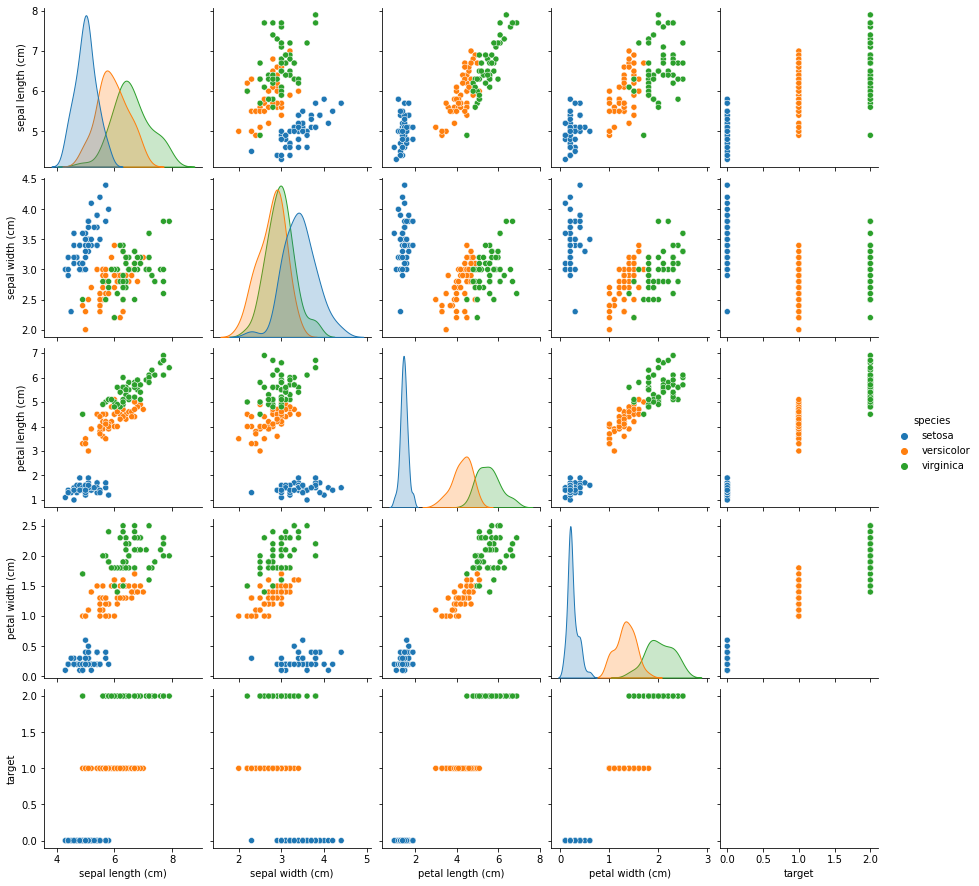

In [12]:
sns.pairplot(df, hue='species')

# As we can see visually in most combinations between
# features the setosa class has a separation of the versicolor and
# virgínica and the versicolor and viginica classes have an overlap between the
# examples.

In [13]:
# Dividing our dataset by 70% for training and 30% for validation

data = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
classes = df['species'].values

(x_train, x_val, y_train, y_val) = train_test_split(data, classes, test_size=0.3,random_state=123)

In [32]:
# Decision Tree
# In this step we build the decision tree and predict the classes for validation

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)

In [28]:
# Evaluating the Algorithm

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



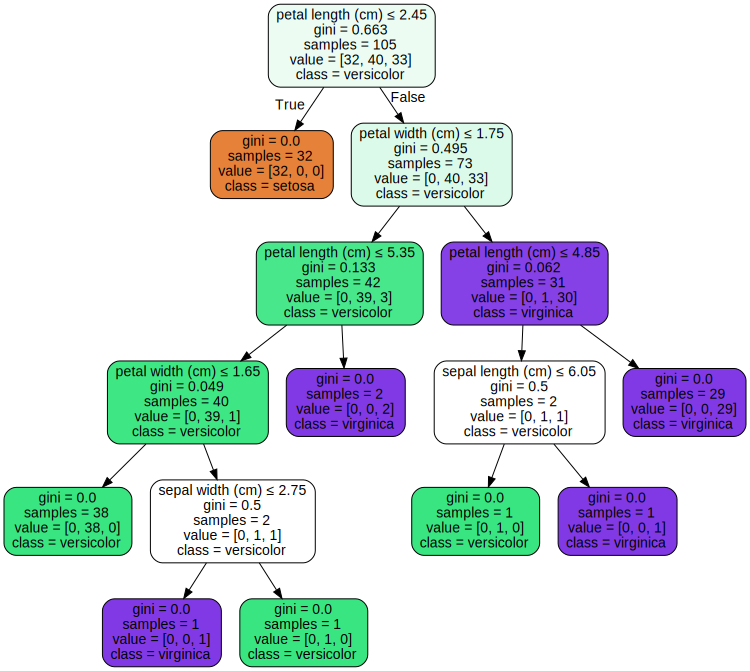

In [17]:
# Viewing the decision tree graphically

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                      feature_names=df.columns[0:4], 
                      class_names=df['species'].unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 